In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Inflation-data.xlsx'
sheet_data = pd.read_excel(file_path, sheet_name='Sheet1')

# Step 1: Remove unnecessary columns
cleaned_data = sheet_data.drop(columns=["Data source", "Note", "Note.1"], errors="ignore")

# Step 2: Remove rows with 30% or less valid data
row_threshold = int(0.3 * cleaned_data.shape[1])  # 30% of the total columns
cleaned_data = cleaned_data[cleaned_data.notnull().sum(axis=1) > row_threshold]

# Step 3: Remove columns with 30% or less valid data
col_threshold = int(0.3 * cleaned_data.shape[0])  # 30% of the total rows
cleaned_data = cleaned_data.loc[:, cleaned_data.notnull().sum(axis=0) > col_threshold]

# Step 4: Ensure year-related data is numeric
year_columns = [col for col in cleaned_data.columns if str(col).isdigit()]
cleaned_data[year_columns] = cleaned_data[year_columns].apply(pd.to_numeric, errors='coerce')

# Step 5: Fill missing values with advanced methods
for col in year_columns:
    cleaned_data[col] = cleaned_data[col].interpolate(method='pchip', limit_direction='both')
    cleaned_data[col] = cleaned_data[col].clip(lower=0)  # Ensure no negative values

# Save the cleaned data to a new Excel file
output_file_path = 'Cleaned_Dataset.xlsx'
cleaned_data.to_excel(output_file_path, index=False)


In [2]:
# import pandas as pd

# # Load the Excel file
# file_path = 'A.xlsx'

# # Define a function to clean and fill missing values in each sheet, handling data types correctly
# def clean_and_fill(sheet_name):
#     # Load the sheet into a DataFrame
#     sheet_data = pd.read_excel(file_path, sheet_name=sheet_name)
    
#     # Columns that are expected to contain strings and should be excluded from the filling process
#     exclude_columns = ['Country Code', 'IMF Country Code', 'Country', 'Indicator Type', 'Series Name']
    
#     # Check which columns are actually present in the sheet
#     present_exclude_columns = [col for col in exclude_columns if col in sheet_data.columns]
    
#     # Separate the string columns from the numeric columns
#     string_data = sheet_data[present_exclude_columns]
    
#     # Convert all other columns to numeric (coerce errors to NaN)
#     numeric_data = sheet_data.drop(columns=present_exclude_columns).apply(pd.to_numeric, errors='coerce')
    
#     # Apply interpolation to the numeric data
#     numeric_data_filled = numeric_data.interpolate(axis=1)
    
#     # Combine the string columns with the filled numeric data
#     cleaned_data = pd.concat([string_data, numeric_data_filled], axis=1)
    
#     # Fill any remaining NaN values with 0 (or other appropriate number)
#     cleaned_data_filled = cleaned_data.fillna(0)
    
#     return cleaned_data_filled

# # Get the sheet names
# excel_data = pd.ExcelFile(file_path)
# sheet_names = excel_data.sheet_names

# # Create a dictionary to store cleaned data for each sheet
# cleaned_data_sheets = {sheet: clean_and_fill(sheet) for sheet in sheet_names}

# # Define the output file path
# output_file_path = 'cleaned_data.xlsx'

# # Write the cleaned data to an Excel file with different sheets
# with pd.ExcelWriter(output_file_path) as writer:
#     for sheet, data in cleaned_data_sheets.items():
#         data.to_excel(writer, sheet_name=sheet, index=False)

# # Return the path of the saved file
# output_file_path


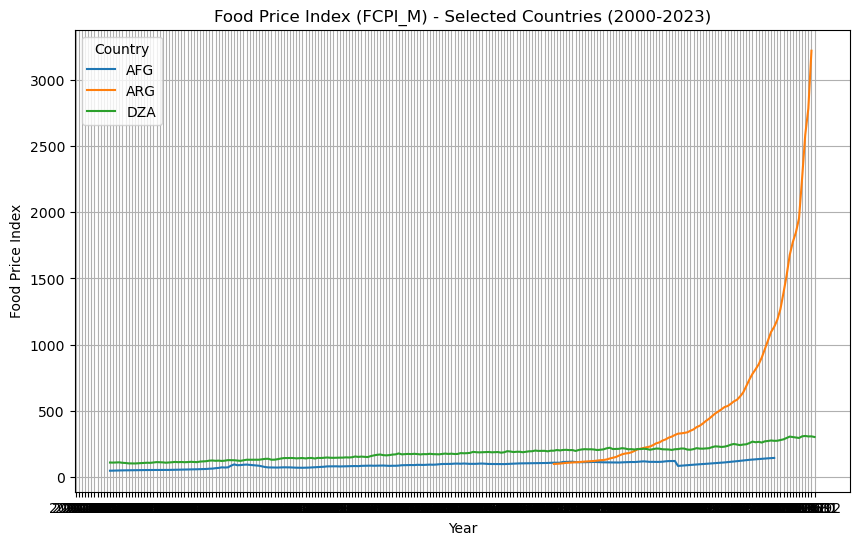

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'A.xlsx'
xls = pd.ExcelFile(file_path)

# Load the FCPI_M sheet
fcpi_m = pd.read_excel(xls, sheet_name='fcpi_m')

# Convert column names to strings to avoid errors with non-string columns
fcpi_m.columns = fcpi_m.columns.astype(str)

# Clean column names to fix truncation issues and ensure correct labeling
fcpi_m.columns = ['Country' if col.startswith('Coun') else col for col in fcpi_m.columns]

# Remove duplicate columns based on the year and reset the index for proper visualization
fcpi_m_filtered = fcpi_m.loc[:, ~fcpi_m.columns.duplicated()]

# Reset index to avoid reindexing issues
fcpi_m_filtered = fcpi_m_filtered.reset_index(drop=True)

# Filter out columns for years between 2000 and 2023
years_fcpi_m = [col for col in fcpi_m_filtered.columns if col.isnumeric() and int(col[:4]) in range(2000, 2024)]

# Select only the relevant columns (Country + years 2000-2023)
fcpi_m_filtered = fcpi_m_filtered[['Country'] + years_fcpi_m]

# Plot the Food Price Index (FCPI_M) for selected countries
plt.figure(figsize=(10, 6))

# Selected countries for visualization
selected_countries = ['AFG', 'ARG', 'DZA']  # Afghanistan, Argentina, and Algeria

# Plotting data for the selected countries
for country in selected_countries:
    country_data = fcpi_m_filtered[fcpi_m_filtered['Country'] == country].iloc[0, 1:]
    plt.plot(fcpi_m_filtered.columns[1:], country_data, label=country)

# Adding title and labels to the plot
plt.title('Food Price Index (FCPI_M) - Selected Countries (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Food Price Index')
plt.legend(title='Country')
plt.grid(True)

# Display the plot
plt.show()


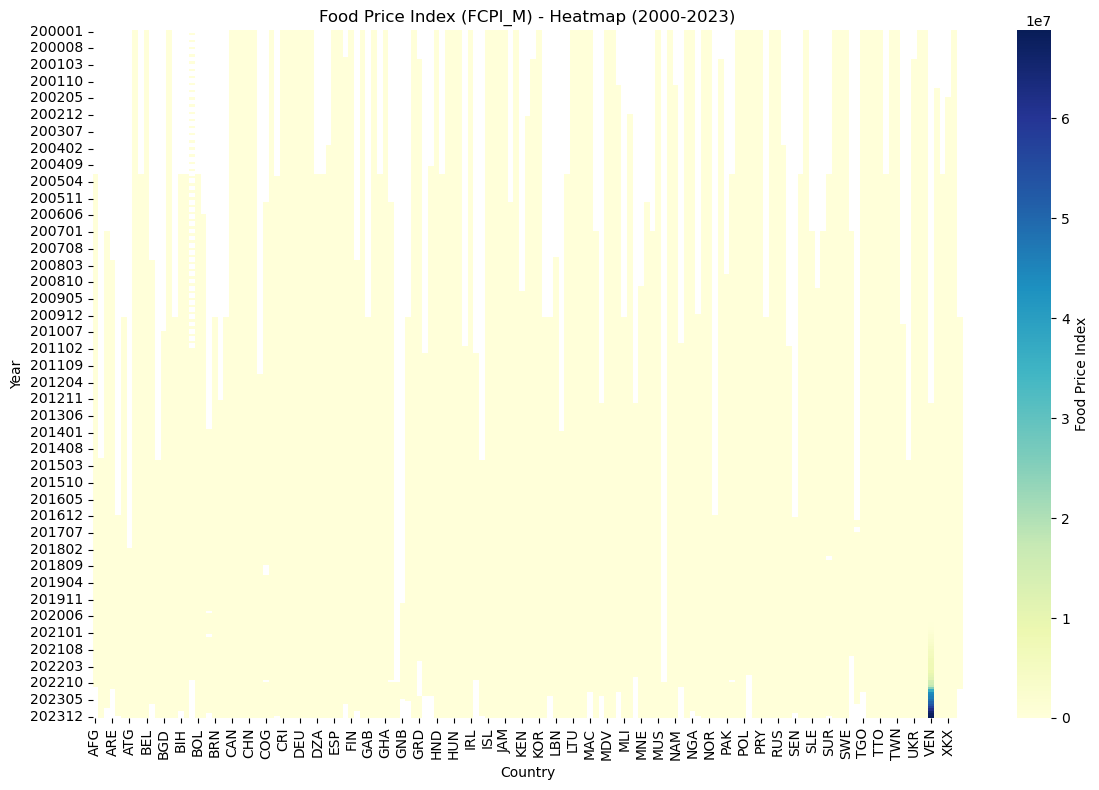

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = 'A.xlsx'
xls = pd.ExcelFile(file_path)

# Load the FCPI_M sheet
fcpi_m = pd.read_excel(xls, sheet_name='fcpi_m')

# Convert column names to strings to avoid errors with non-string columns
fcpi_m.columns = fcpi_m.columns.astype(str)

# Clean column names to fix truncation issues and ensure correct labeling
fcpi_m.columns = ['Country' if col.startswith('Coun') else col for col in fcpi_m.columns]

# Remove duplicate columns based on the year and reset the index for proper visualization
fcpi_m_filtered = fcpi_m.loc[:, ~fcpi_m.columns.duplicated()]

# Reset index to avoid reindexing issues
fcpi_m_filtered = fcpi_m_filtered.reset_index(drop=True)

# Filter out columns for years between 2000 and 2023
years_fcpi_m = [col for col in fcpi_m_filtered.columns if col.isnumeric() and int(col[:4]) in range(2000, 2024)]

# Select only the relevant columns (Country + years 2000-2023)
fcpi_m_filtered = fcpi_m_filtered[['Country'] + years_fcpi_m]

# Prepare the data for the heatmap
# Set the country names as rows and years as columns
heatmap_data = fcpi_m_filtered.set_index('Country').transpose()

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt='.2f', cbar_kws={'label': 'Food Price Index'})
plt.title('Food Price Index (FCPI_M) - Heatmap (2000-2023)')
plt.xlabel('Country')
plt.ylabel('Year')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

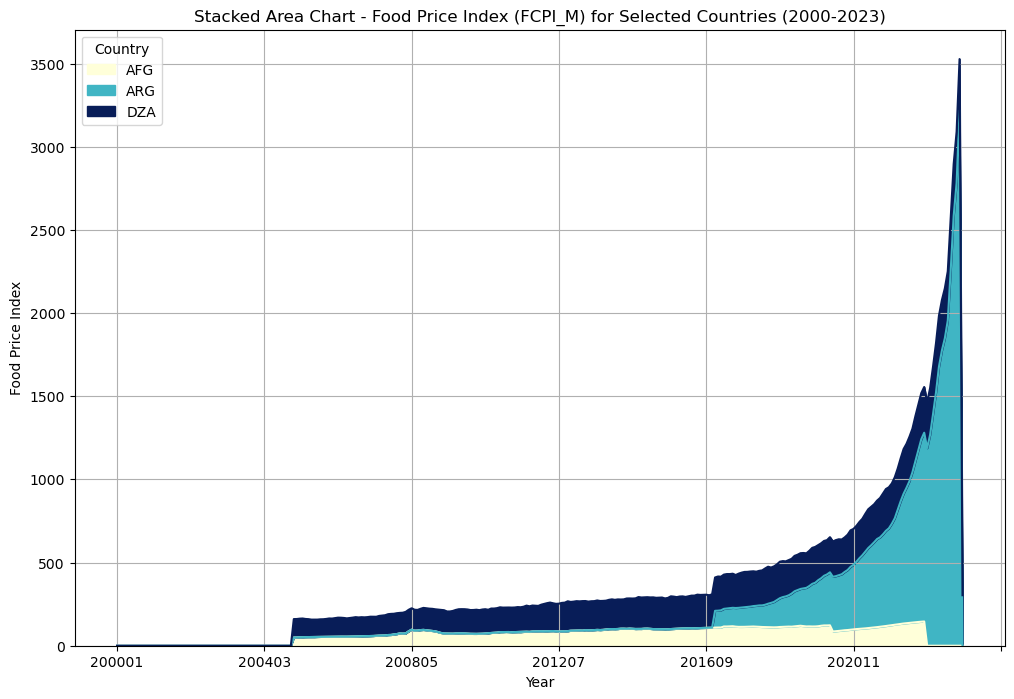

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'A.xlsx'
xls = pd.ExcelFile(file_path)

# Load the FCPI_M sheet
fcpi_m = pd.read_excel(xls, sheet_name='fcpi_m')

# Convert column names to strings to avoid errors with non-string columns
fcpi_m.columns = fcpi_m.columns.astype(str)

# Clean column names to fix truncation issues and ensure correct labeling
fcpi_m.columns = ['Country' if col.startswith('Coun') else col for col in fcpi_m.columns]

# Remove duplicate columns based on the year and reset the index for proper visualization
fcpi_m_filtered = fcpi_m.loc[:, ~fcpi_m.columns.duplicated()]

# Reset index to avoid reindexing issues
fcpi_m_filtered = fcpi_m_filtered.reset_index(drop=True)

# Filter out columns for years between 2000 and 2023
years_fcpi_m = [col for col in fcpi_m_filtered.columns if col.isnumeric() and int(col[:4]) in range(2000, 2024)]

# Select only the relevant columns (Country + years 2000-2023)
fcpi_m_filtered = fcpi_m_filtered[['Country'] + years_fcpi_m]

# Prepare the data for the stacked area chart
# Select countries for visualization
selected_countries = ['AFG', 'ARG', 'DZA']  # Afghanistan, Argentina, and Algeria

# Filter data for selected countries
stacked_data = fcpi_m_filtered[fcpi_m_filtered['Country'].isin(selected_countries)].set_index('Country').transpose()

# Plot stacked area chart
plt.figure(figsize=(12, 8))
stacked_data.plot(kind='area', stacked=True, figsize=(12, 8), colormap='YlGnBu')

# Add title and labels to the plot
plt.title('Stacked Area Chart - Food Price Index (FCPI_M) for Selected Countries (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Food Price Index')
plt.grid(True)

# Show the plot
plt.show()


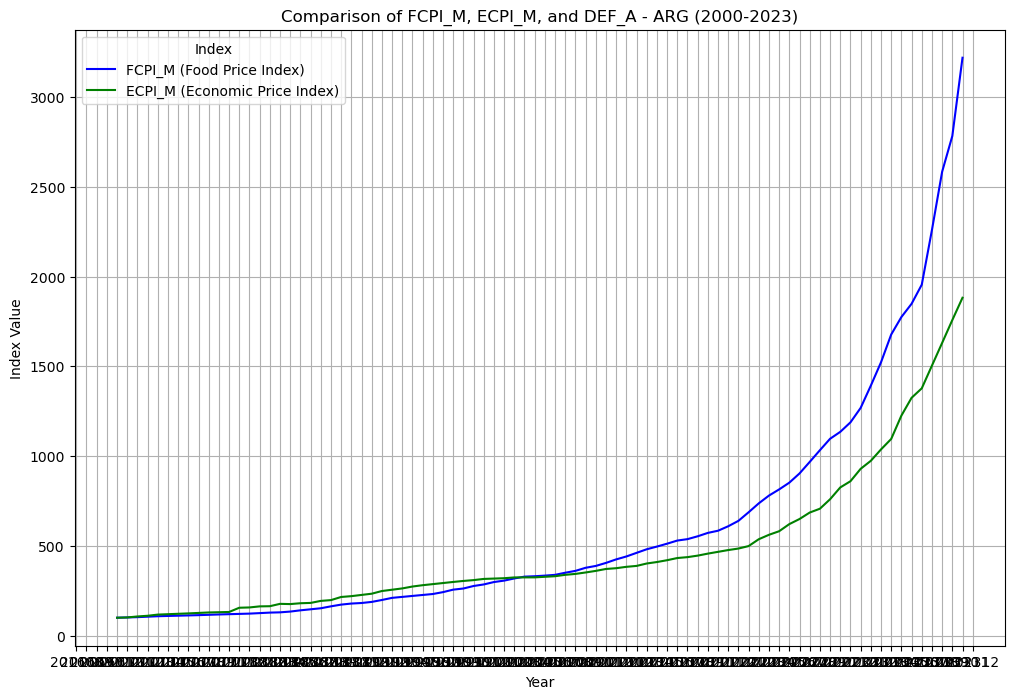

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'A.xlsx'
xls = pd.ExcelFile(file_path)

# Load the FCPI_M, ECPI_M, and DEF_A sheets
fcpi_m = pd.read_excel(xls, sheet_name='fcpi_m')
ecpi_m = pd.read_excel(xls, sheet_name='ecpi_m')
def_a = pd.read_excel(xls, sheet_name='def_a')

# Convert column names to strings for easier processing
fcpi_m.columns = fcpi_m.columns.astype(str)
ecpi_m.columns = ecpi_m.columns.astype(str)
def_a.columns = def_a.columns.astype(str)

# Clean column names to ensure correct labeling for comparison
fcpi_m.columns = ['Country' if col.startswith('Coun') else col for col in fcpi_m.columns]
ecpi_m.columns = ['Country' if col.startswith('Coun') else col for col in ecpi_m.columns]
def_a.columns = ['Country' if col.startswith('Coun') else col for col in def_a.columns]

# Remove duplicates and reset the index
fcpi_m_filtered = fcpi_m.loc[:, ~fcpi_m.columns.duplicated()].reset_index(drop=True)
ecpi_m_filtered = ecpi_m.loc[:, ~ecpi_m.columns.duplicated()].reset_index(drop=True)
def_a_filtered = def_a.loc[:, ~def_a.columns.duplicated()].reset_index(drop=True)

# Filter data for the years 2000-2023
years_fcpi_m = [col for col in fcpi_m_filtered.columns if col.isnumeric() and int(col[:4]) in range(2000, 2024)]
years_ecpi_m = [col for col in ecpi_m_filtered.columns if col.isnumeric() and int(col[:4]) in range(2000, 2024)]
years_def_a = [col for col in def_a_filtered.columns if col.isnumeric() and int(col[:4]) in range(2000, 2024)]

# Select only the relevant columns (Country + years 2000-2023)
fcpi_m_filtered = fcpi_m_filtered[['Country'] + years_fcpi_m]
ecpi_m_filtered = ecpi_m_filtered[['Country'] + years_ecpi_m]
def_a_filtered = def_a_filtered[['Country'] + years_def_a]

# Merge FCPI_M, ECPI_M, and DEF_A datasets for comparison
merged_data = pd.merge(fcpi_m_filtered, ecpi_m_filtered, on='Country', suffixes=('_fcpi', '_ecpi'))
merged_data = pd.merge(merged_data, def_a_filtered, on='Country')

# Plot FCPI_M, ECPI_M, and DEF_A Comparison for Argentina ('ARG')
plt.figure(figsize=(12, 8))

# Select Argentina ('ARG')
country = 'ARG'
country_data = merged_data[merged_data['Country'] == country]

# Plot each index
plt.plot(years_fcpi_m, country_data.iloc[0, 1:len(years_fcpi_m) + 1].values, label='FCPI_M (Food Price Index)', color='blue')
plt.plot(years_ecpi_m, country_data.iloc[0, len(years_fcpi_m) + 1:len(years_fcpi_m) + len(years_ecpi_m) + 1].values, label='ECPI_M (Economic Price Index)', color='green')

# Add title and labels
plt.title(f'Comparison of FCPI_M, ECPI_M, and DEF_A - {country} (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend(title='Index')
plt.grid(True)

# Show the plot
plt.show()


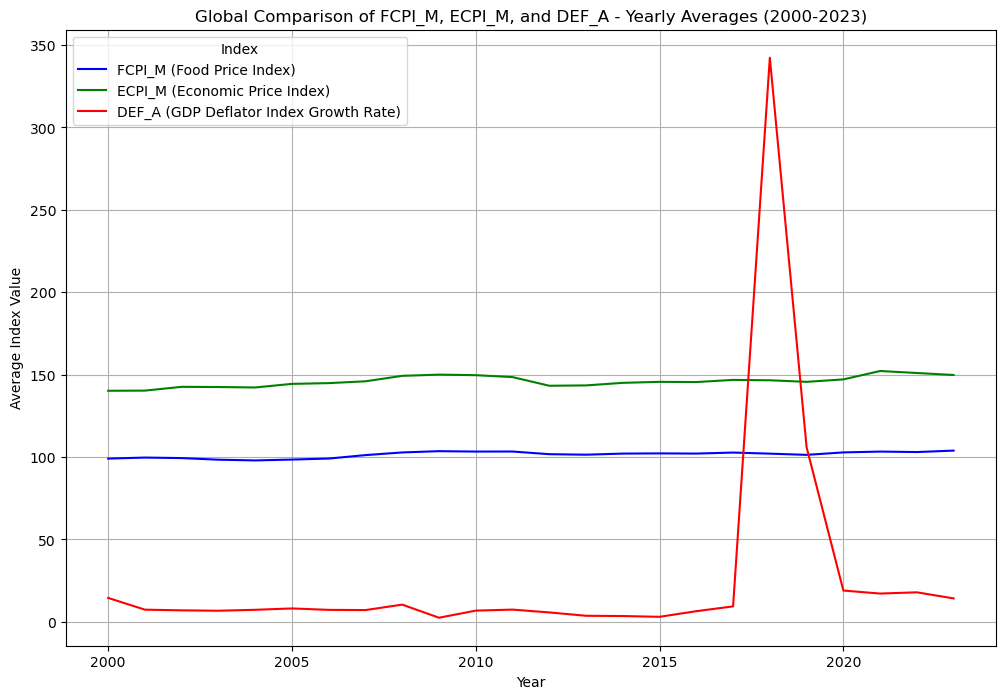

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'A.xlsx'
xls = pd.ExcelFile(file_path)

# Load the FCPI_M, ECPI_M, and DEF_A sheets
fcpi_m = pd.read_excel(xls, sheet_name='fcpi_m')
ecpi_m = pd.read_excel(xls, sheet_name='ecpi_m')
def_a = pd.read_excel(xls, sheet_name='def_a')

# Convert column names to strings for easier processing
fcpi_m.columns = fcpi_m.columns.astype(str)
ecpi_m.columns = ecpi_m.columns.astype(str)
def_a.columns = def_a.columns.astype(str)

# Clean column names to ensure correct labeling for comparison
fcpi_m.columns = ['Country' if col.startswith('Coun') else col for col in fcpi_m.columns]
ecpi_m.columns = ['Country' if col.startswith('Coun') else col for col in ecpi_m.columns]
def_a.columns = ['Country' if col.startswith('Coun') else col for col in def_a.columns]

# Remove duplicates and reset the index
fcpi_m_filtered = fcpi_m.loc[:, ~fcpi_m.columns.duplicated()].reset_index(drop=True)
ecpi_m_filtered = ecpi_m.loc[:, ~ecpi_m.columns.duplicated()].reset_index(drop=True)
def_a_filtered = def_a.loc[:, ~def_a.columns.duplicated()].reset_index(drop=True)

# Filter data for the years 2000-2023
years_fcpi_m = [col for col in fcpi_m_filtered.columns if col.isnumeric() and int(col[:4]) in range(2000, 2024)]
years_ecpi_m = [col for col in ecpi_m_filtered.columns if col.isnumeric() and int(col[:4]) in range(2000, 2024)]
years_def_a = [col for col in def_a_filtered.columns if col.isnumeric() and int(col[:4]) in range(2000, 2024)]

# Select only the relevant columns (Country + years 2000-2023)
fcpi_m_filtered = fcpi_m_filtered[['Country'] + years_fcpi_m]
ecpi_m_filtered = ecpi_m_filtered[['Country'] + years_ecpi_m]
def_a_filtered = def_a_filtered[['Country'] + years_def_a]

# Calculate the yearly averages for each index across all countries
fcpi_m_avg = fcpi_m_filtered[years_fcpi_m].mean(axis=0)  # Average for FCPI_M across all countries
ecpi_m_avg = ecpi_m_filtered[years_ecpi_m].mean(axis=0)  # Average for ECPI_M across all countries
def_a_avg = def_a_filtered[years_def_a].mean(axis=0)  # Average for DEF_A across all countries

# Ensure that all indices have the same year range and align the years for plotting
common_years = list(range(2000, 2024))

# Re-align the data for each index based on the common years (2000-2023)
fcpi_m_avg_aligned = fcpi_m_avg[common_years[0]-2000:common_years[-1]-2000+1]
ecpi_m_avg_aligned = ecpi_m_avg[common_years[0]-2000:common_years[-1]-2000+1]
def_a_avg_aligned = def_a_avg[common_years[0]-2000:common_years[-1]-2000+1]

# Plot the global averages for FCPI_M, ECPI_M, and DEF_A
plt.figure(figsize=(12, 8))

# Plot each index's average values over the years
plt.plot(common_years, fcpi_m_avg_aligned, label='FCPI_M (Food Price Index)', color='blue')
plt.plot(common_years, ecpi_m_avg_aligned, label='ECPI_M (Economic Price Index)', color='green')
plt.plot(common_years, def_a_avg_aligned, label='DEF_A (GDP Deflator Index Growth Rate)', color='red')

# Add title and labels
plt.title('Global Comparison of FCPI_M, ECPI_M, and DEF_A - Yearly Averages (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Average Index Value')
plt.legend(title='Index')
plt.grid(True)

# Show the plot
plt.show()


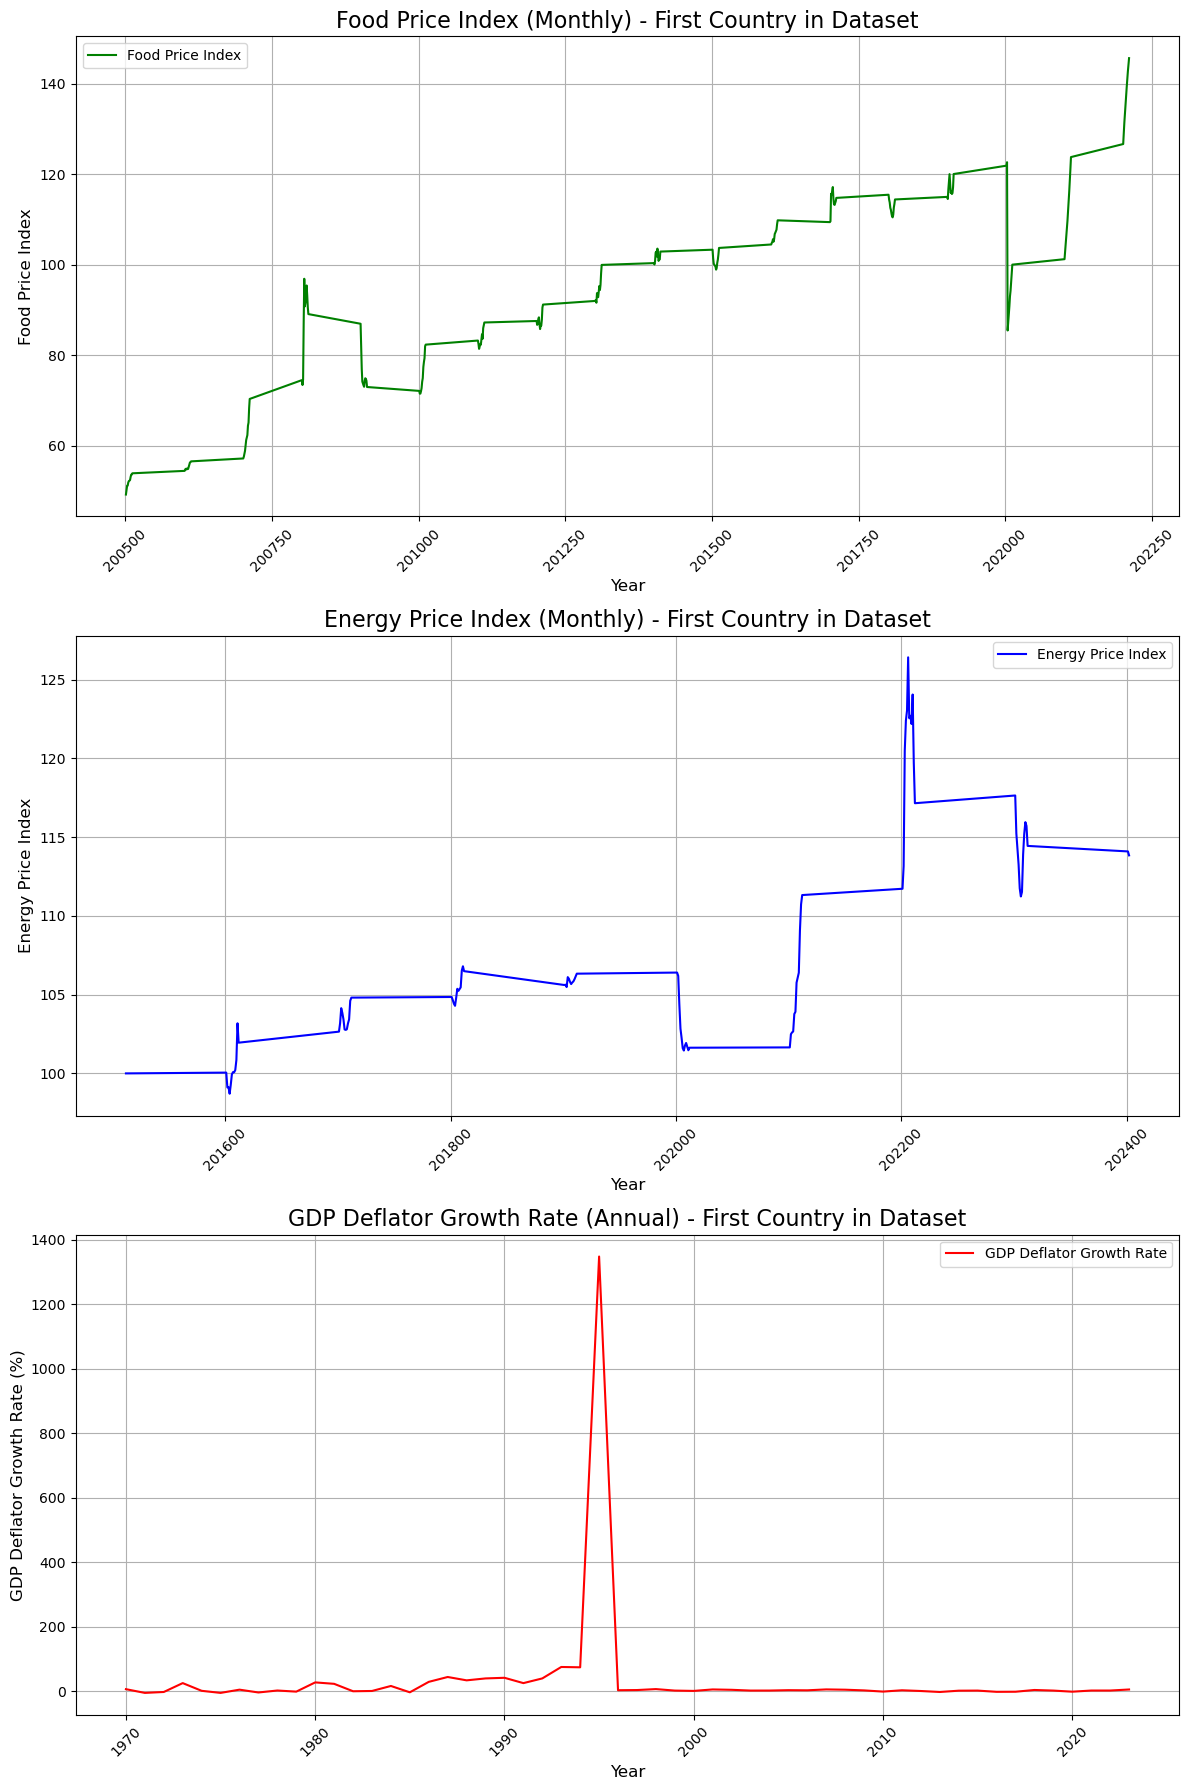

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'A.xlsx'
xls = pd.ExcelFile(file_path)

# Load relevant sheets
fcpi_m = pd.read_excel(xls, sheet_name='fcpi_m')
ecpi_m = pd.read_excel(xls, sheet_name='ecpi_m')
def_a = pd.read_excel(xls, sheet_name='def_a')

# Clean the data (ensure only numeric columns are used)
fcpi_m_cleaned = fcpi_m.loc[:, pd.to_numeric(fcpi_m.columns, errors='coerce').notna()]
ecpi_m_cleaned = ecpi_m.loc[:, pd.to_numeric(ecpi_m.columns, errors='coerce').notna()]
def_a_cleaned = def_a.loc[:, pd.to_numeric(def_a.columns, errors='coerce').notna()]

# Select the first country for visualization (you can change this as needed)
first_country_fcpi = fcpi_m_cleaned.iloc[0]
first_country_ecpi = ecpi_m_cleaned.iloc[0]
first_country_def_a = def_a_cleaned.iloc[0]

# Create a dashboard with subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot Food Price Index (Monthly)
axs[0].plot(first_country_fcpi.index, first_country_fcpi.values, label="Food Price Index", color='green')
axs[0].set_title('Food Price Index (Monthly) - First Country in Dataset', fontsize=16)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('Food Price Index', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(True)
axs[0].legend()

# Plot Energy Price Index (Monthly)
axs[1].plot(first_country_ecpi.index, first_country_ecpi.values, label="Energy Price Index", color='blue')
axs[1].set_title('Energy Price Index (Monthly) - First Country in Dataset', fontsize=16)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Energy Price Index', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)
axs[1].legend()

# Plot GDP Deflator Growth Rate (Annual)
axs[2].plot(first_country_def_a.index, first_country_def_a.values, label="GDP Deflator Growth Rate", color='red')
axs[2].set_title('GDP Deflator Growth Rate (Annual) - First Country in Dataset', fontsize=16)
axs[2].set_xlabel('Year', fontsize=12)
axs[2].set_ylabel('GDP Deflator Growth Rate (%)', fontsize=12)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(True)
axs[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


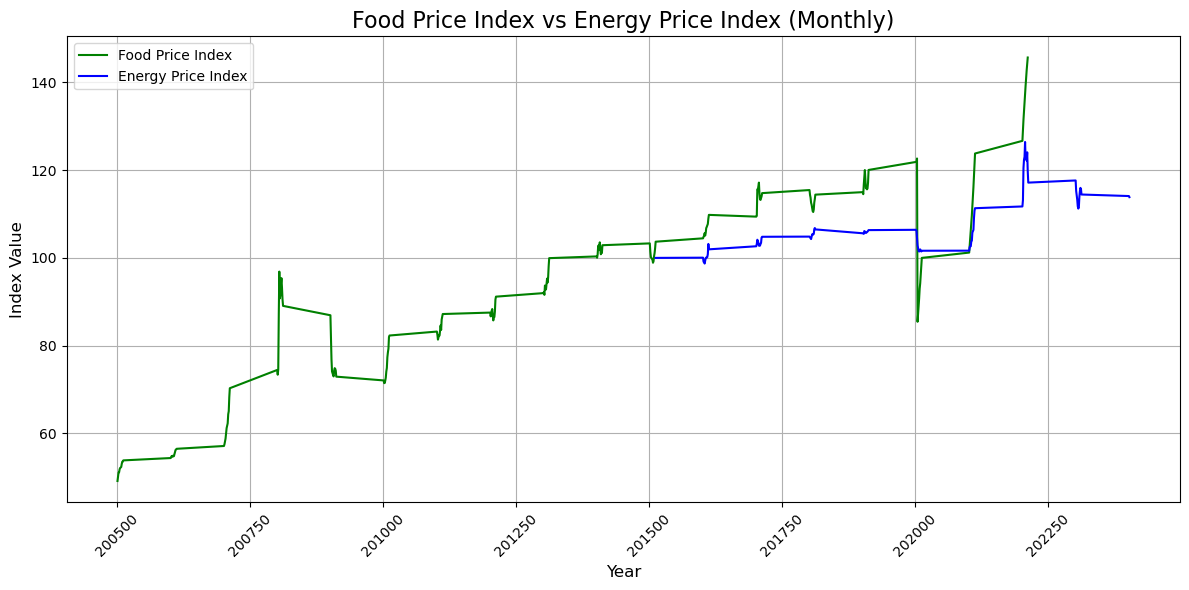

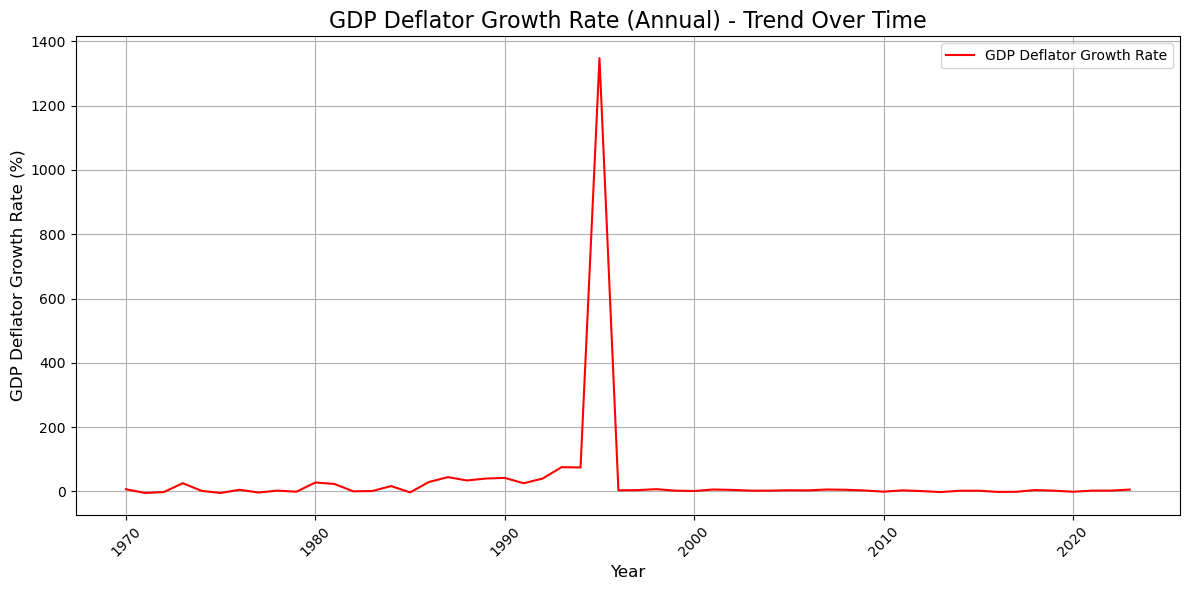

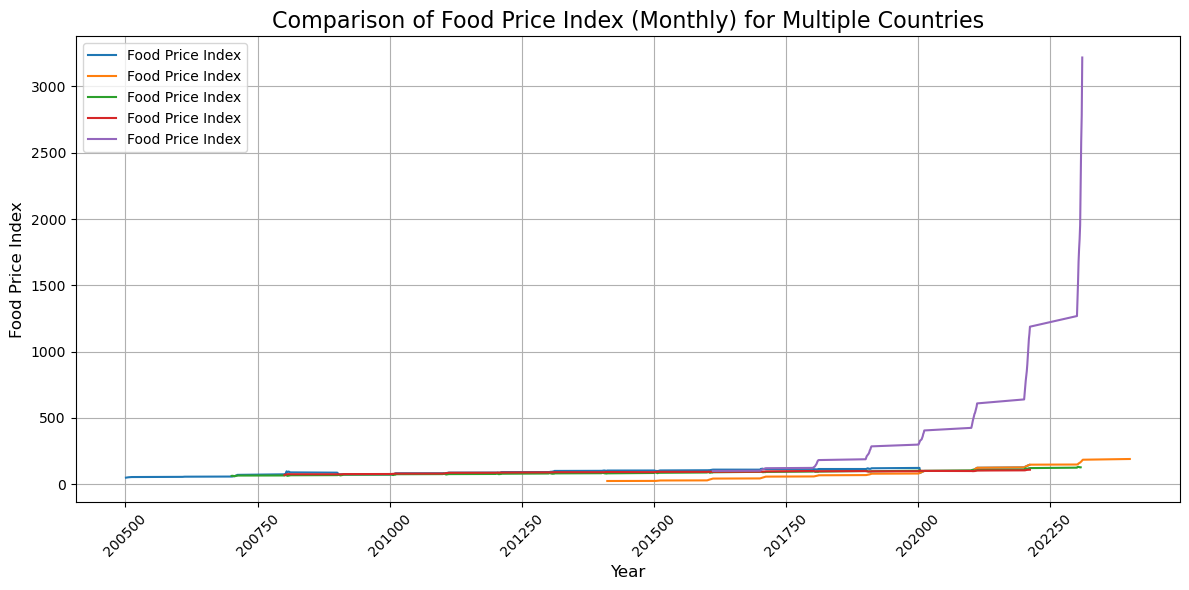

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'A.xlsx'
xls = pd.ExcelFile(file_path)

# Load relevant sheets
fcpi_m = pd.read_excel(xls, sheet_name='fcpi_m')
ecpi_m = pd.read_excel(xls, sheet_name='ecpi_m')
def_a = pd.read_excel(xls, sheet_name='def_a')

# Clean the data (ensure only numeric columns are used)
fcpi_m_cleaned = fcpi_m.loc[:, pd.to_numeric(fcpi_m.columns, errors='coerce').notna()]
ecpi_m_cleaned = ecpi_m.loc[:, pd.to_numeric(ecpi_m.columns, errors='coerce').notna()]
def_a_cleaned = def_a.loc[:, pd.to_numeric(def_a.columns, errors='coerce').notna()]

# Select the first country for visualization (you can change this as needed)
first_country_fcpi = fcpi_m_cleaned.iloc[0]
first_country_ecpi = ecpi_m_cleaned.iloc[0]
first_country_def_a = def_a_cleaned.iloc[0]

# --------------------------- 1. Food Price Index vs Energy Price Index ---------------------------
# Create a figure for comparing Food and Energy Price Indices
plt.figure(figsize=(12, 6))

# Plot the Food Price Index and Energy Price Index on the same chart
plt.plot(first_country_fcpi.index, first_country_fcpi.values, label="Food Price Index", color='green')
plt.plot(first_country_ecpi.index, first_country_ecpi.values, label="Energy Price Index", color='blue')

# Title and labels
plt.title('Food Price Index vs Energy Price Index (Monthly)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# --------------------------- 2. Trend of GDP Deflator Growth Rate ---------------------------
# Create a figure for GDP Deflator Growth Rate (Annual)
plt.figure(figsize=(12, 6))

# Plot the GDP Deflator Growth Rate over time
plt.plot(first_country_def_a.index, first_country_def_a.values, label="GDP Deflator Growth Rate", color='red')

# Title and labels
plt.title('GDP Deflator Growth Rate (Annual) - Trend Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Deflator Growth Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# --------------------------- 3. Comparison of Food Price Index for Multiple Countries ---------------------------
# For this comparison, let's select the first 5 countries from the dataset for the Food Price Index (Monthly)
countries_to_compare = fcpi_m_cleaned.iloc[:5, :]

# Create a figure to compare Food Price Index for multiple countries
plt.figure(figsize=(12, 6))

# Plot Food Price Index for each of the selected countries
for country_data in countries_to_compare.values:
    plt.plot(countries_to_compare.columns, country_data, label="Food Price Index")

# Title and labels
plt.title('Comparison of Food Price Index (Monthly) for Multiple Countries', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Food Price Index', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

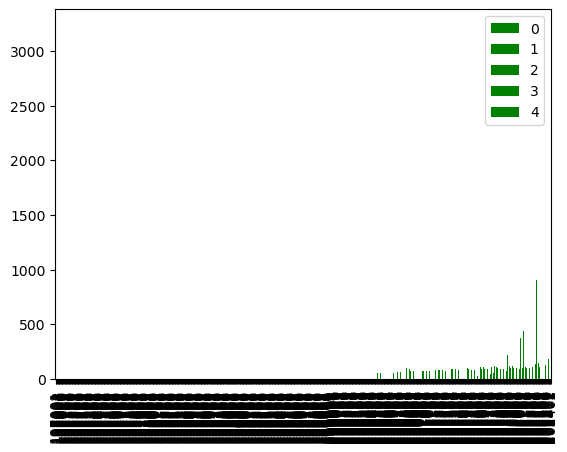

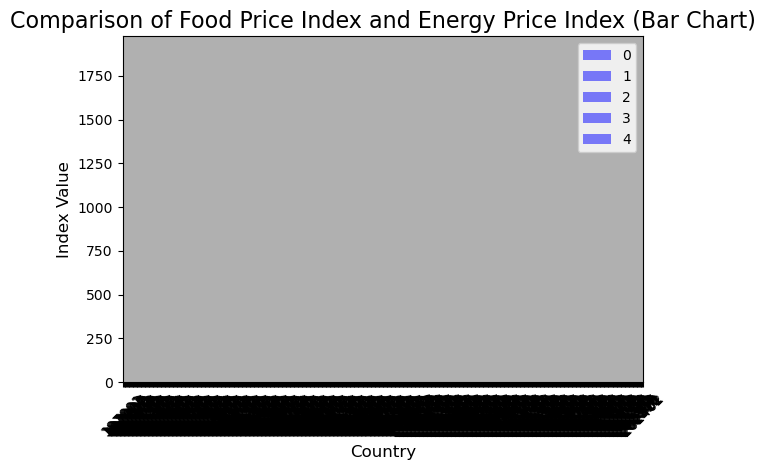

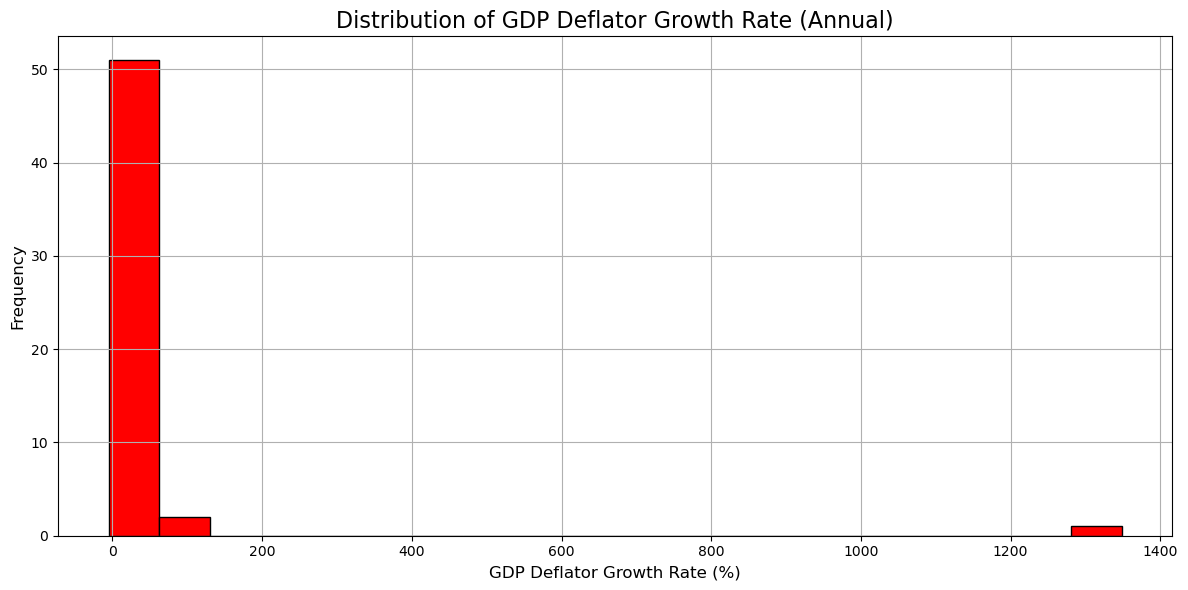

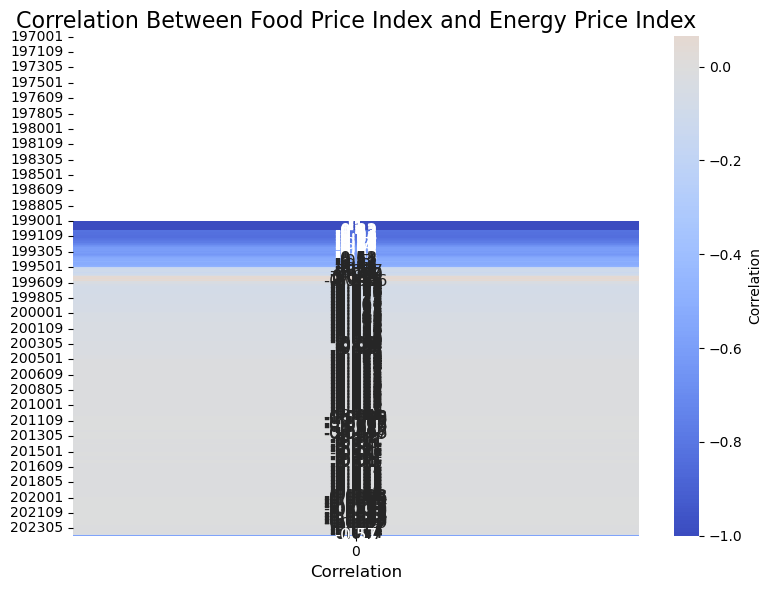

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'A.xlsx'
xls = pd.ExcelFile(file_path)

# Load relevant sheets
fcpi_m = pd.read_excel(xls, sheet_name='fcpi_m')
ecpi_m = pd.read_excel(xls, sheet_name='ecpi_m')
def_a = pd.read_excel(xls, sheet_name='def_a')

# Clean the data (ensure only numeric columns are used)
fcpi_m_cleaned = fcpi_m.loc[:, pd.to_numeric(fcpi_m.columns, errors='coerce').notna()]
ecpi_m_cleaned = ecpi_m.loc[:, pd.to_numeric(ecpi_m.columns, errors='coerce').notna()]
def_a_cleaned = def_a.loc[:, pd.to_numeric(def_a.columns, errors='coerce').notna()]

# Select the first country for visualization (you can change this as needed)
first_country_fcpi = fcpi_m_cleaned.iloc[0]
first_country_ecpi = ecpi_m_cleaned.iloc[0]
first_country_def_a = def_a_cleaned.iloc[0]

# --------------------------- 1. Bar Chart for Food Price Index vs Energy Price Index for Multiple Countries ---------------------------
# Select data for the first 5 countries from the cleaned datasets
fcpi_first_5_countries = fcpi_m_cleaned.iloc[:5, :]
ecpi_first_5_countries = ecpi_m_cleaned.iloc[:5, :]

# Transpose the data to have countries as columns for better plotting
fcpi_first_5_countries = fcpi_first_5_countries.T
ecpi_first_5_countries = ecpi_first_5_countries.T

# Create a bar plot comparing Food Price Index and Energy Price Index for the first 5 countries
plt.figure(figsize=(12, 6))

# Plot data for Food Price and Energy Price indices
fcpi_first_5_countries.plot(kind='bar', color='green', label="Food Price Index")
ecpi_first_5_countries.plot(kind='bar', color='blue', label="Energy Price Index", alpha=0.5)

# Title and labels
plt.title('Comparison of Food Price Index and Energy Price Index (Bar Chart)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Index Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# --------------------------- 2. Histogram for GDP Deflator Growth Rate ---------------------------
plt.figure(figsize=(12, 6))

# Plotting the histogram for GDP Deflator Growth Rate
plt.hist(first_country_def_a.values, bins=20, color='red', edgecolor='black')

# Title and labels
plt.title('Distribution of GDP Deflator Growth Rate (Annual)', fontsize=16)
plt.xlabel('GDP Deflator Growth Rate (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# --------------------------- 3. Heatmap for Correlation Between Food Price Index and Energy Price Index ---------------------------
# Compute the correlation matrix between the Food Price Index and Energy Price Index for all countries
correlation_matrix = fcpi_m_cleaned.corrwith(ecpi_m_cleaned)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'}, annot_kws={'size': 12})

# Title and labels
plt.title('Correlation Between Food Price Index and Energy Price Index', fontsize=16)
plt.xlabel('Correlation', fontsize=12)
plt.tight_layout()
plt.show()
